<a href="https://colab.research.google.com/github/skj092/Human-Face-Detection-System/blob/main/Face_Detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L "https://universe.roboflow.com/ds/9PNPH32Bn3?key=4oGDkixXLm" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.predict(
   source='https://media.roboflow.com/notebooks/examples/dog.jpeg',
   conf=0.25
)

100%|██████████| 6.23M/6.23M [00:00<00:00, 69.7MB/s]

100%|██████████| 104k/104k [00:00<00:00, 19.9MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 78.9ms
Speed: 13.0ms preprocess, 78.9ms inference, 33.9ms postprocess per image at shape (1, 3, 640, 384)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={"/content"}/data.yaml epochs=100 imgsz=640

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

In [9]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data={"/content/"}/data.yaml

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/valid/labels.cache... 5 images, 1 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  3.95it/s]
                   all          5          4       0.38          1      0.995       0.92
Speed: 0.3ms preprocess, 18.5ms inference, 0.0ms loss, 19.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source={"/content"}/test/images

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/2 /content/test/images/capture_10_jpg.rf.a21fc9b7e2008a415506af6b9e61a443.jpg: 640x640 8 faces, 16.4ms
image 2/2 /content/test/images/capture_116_jpg.rf.b02c19012b4aadf656c0cbf51dc6969d.jpg: 640x640 11 faces, 16.3ms
Speed: 4.2ms preprocess, 16.3ms inference, 80.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [13]:
!yolo export model=yolov8n.pt format=onnx

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.30GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 290.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 7.8s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (9.9s)
Results saved to /content
Predict:         yolo predict 

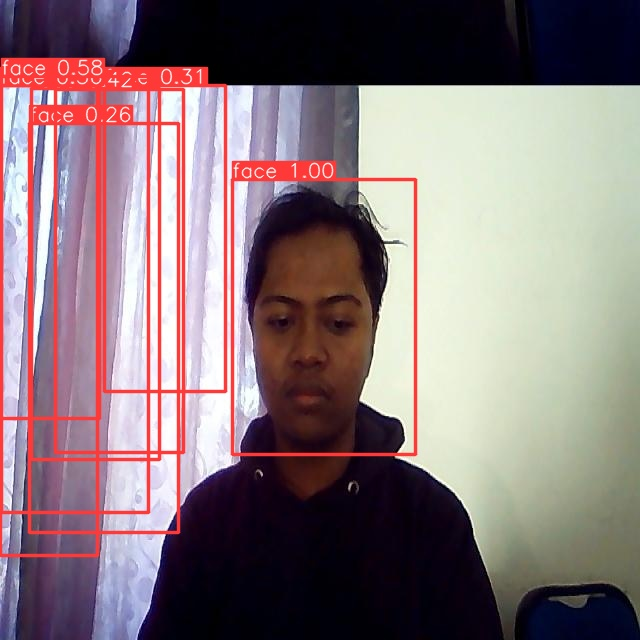

In [15]:
from PIL import Image
from glob import glob
images = glob('runs/detect/predict/*')
Image.open(images[0])